# Generating lightcurves with Aperture and PSF photometry

There are two options for photometry methods in **TESSreduce**: aperture and PSF. These two methods have their strengths and weakenesses, where in some cases one method may outperform another. The method can be set using the **phot_method** variable in tessreduce.

In [1]:
import tessreduce as tr
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In this notebook we will first compare the photometry obtained for AT 2020nni for both aperture and PSF photometry. 

|   Sector | Covers   |   Time difference  |
|          |          |             (days) |
|----------+----------+--------------------|
|       26 | True     |                  0 |
|       40 | False    |                363 |
|       53 | False    |                717 |
|       80 | False    |               1453 |
getting TPF from TESScut
made reference
!!!WARNING!!! mask is too dense, lowering mask_scale to 0.5, and raising maglim to 15. Background quality will be reduced.
made source mask
calculating background
background subtracted
Aligning images
!!Re-running for difference image!!
shifting images
remade mask
background
Background correlation correction
Field calibration
Target is above -30 dec, calibrating to PS1 photometry.


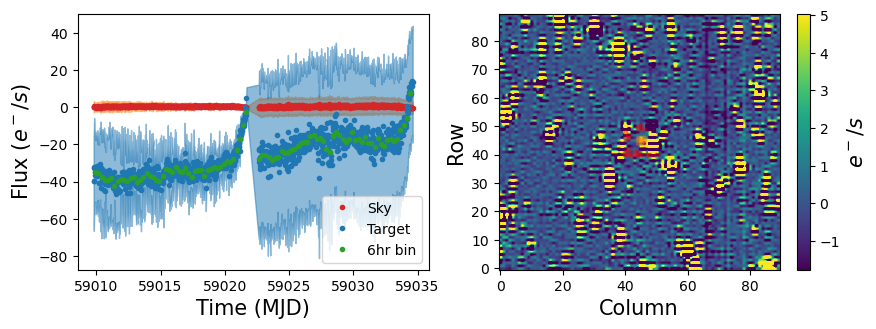

In [6]:
obs = tr.sn_lookup('at2020nni',time='disc')
tess = tr.tessreduce(obs_list=obs[0],phot_method='aperture')

The aperture photometry looks quite rough. There are still some trends in the data, and no clear transient. We can also test the psf photometry method in the **diff_lc** function by setting the phot_method variable.

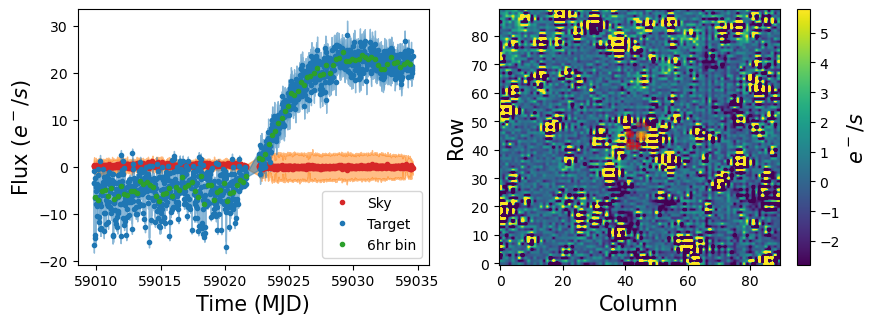

In [9]:
psf,_= tess.diff_lc(phot_method='psf',plot=True)

In the PSF lightcurve all remaining trends have dissapeared and we find a beautiful supernova lightcurve. Lets compare the two lightcurves.

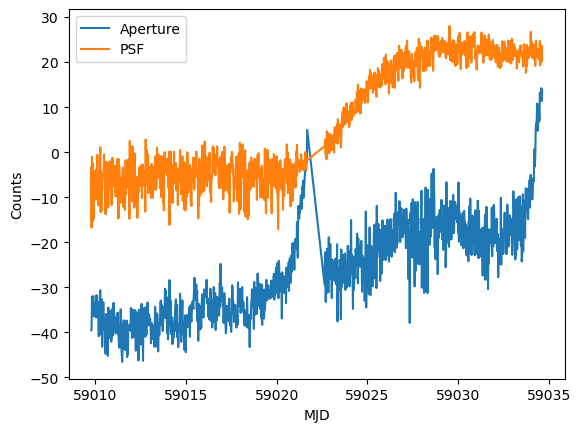

In [15]:
plt.figure()
plt.plot(tess.lc[0],tess.lc[1],label='Aperture')
plt.plot(psf[0],psf[1],label='PSF')
plt.legend()
plt.ylabel('Counts')
plt.xlabel('MJD');

In this case clearly PSF photometry is the option to use, however, it may not always be so. Sometimes the PSF photometry method will fail while aperture succeeds, but in general PSF photometry is more effective, however it has a larger computation cost. 

Keep in mind that the zeropoint calcuated for one method will NOT apply to the other method. 